In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
import streamlit as st

In [2]:
df = pd.read_csv('../data/benin-malanville.csv')


In [3]:
summary_stats = df.describe()
summary_stats

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [4]:
missing_values = df.isnull().sum()
print(missing_values)


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
negative_values = df[['GHI', 'DNI', 'DHI']].lt(0).sum()
negative_values

GHI    258847
DNI    275987
DHI    259182
dtype: int64

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

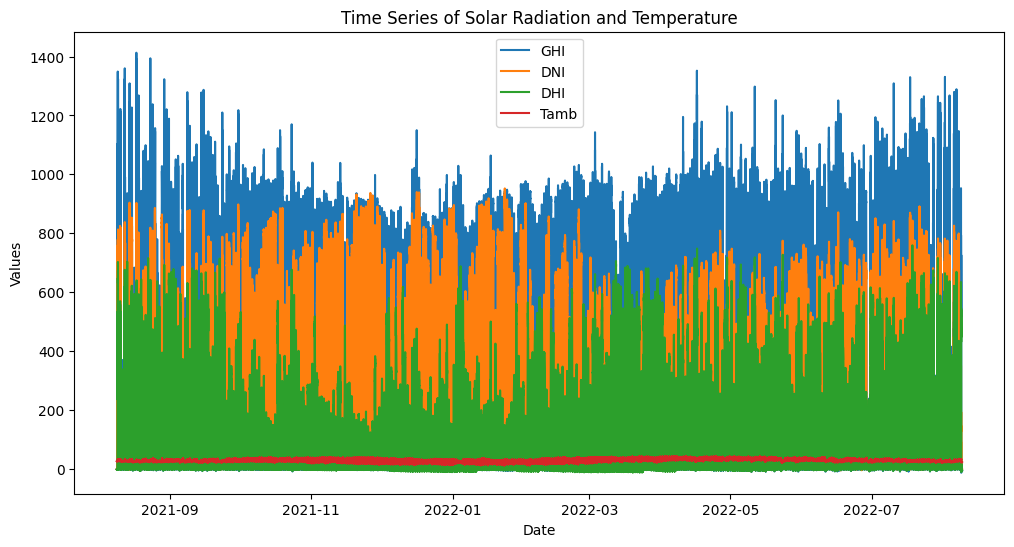

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Time Series of Solar Radiation and Temperature')
plt.show()

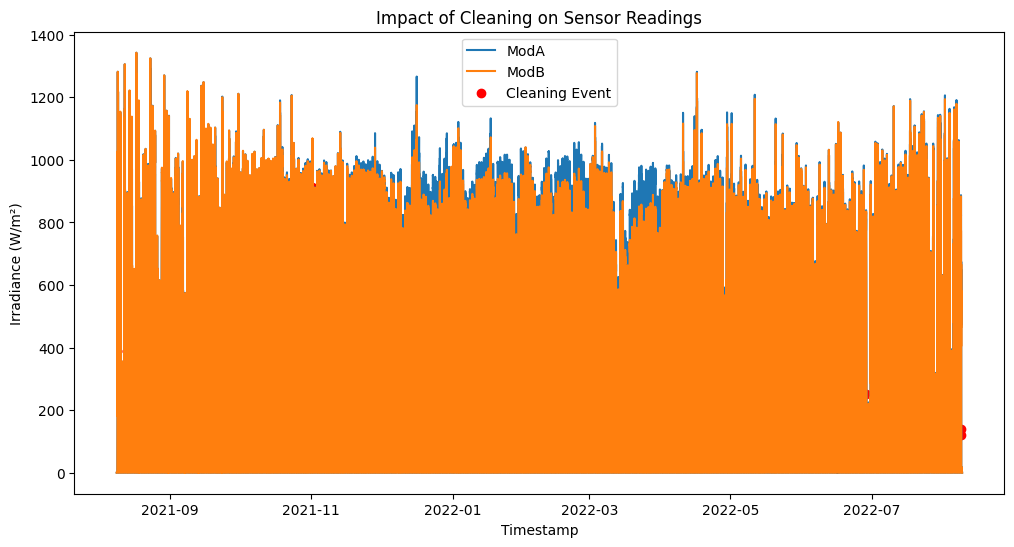

In [8]:
# Plot ModA and ModB over time, highlighting when cleaning occurred
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['ModA'], label='ModA')
plt.plot(df['Timestamp'], df['ModB'], label='ModB')
plt.scatter(df[df['Cleaning'] == 1]['Timestamp'], df[df['Cleaning'] == 1]['ModA'], color='red', label='Cleaning Event')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.title('Impact of Cleaning on Sensor Readings')
plt.show()


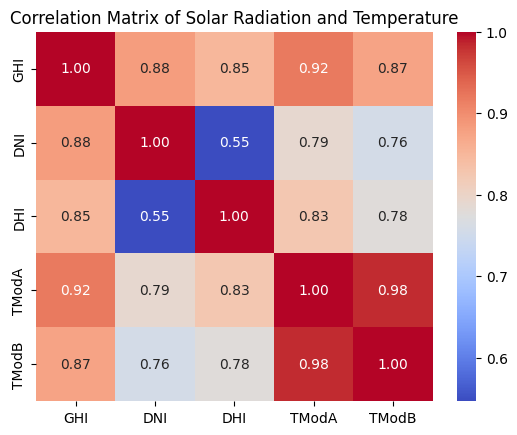

In [42]:
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Solar Radiation and Temperature')
plt.show()


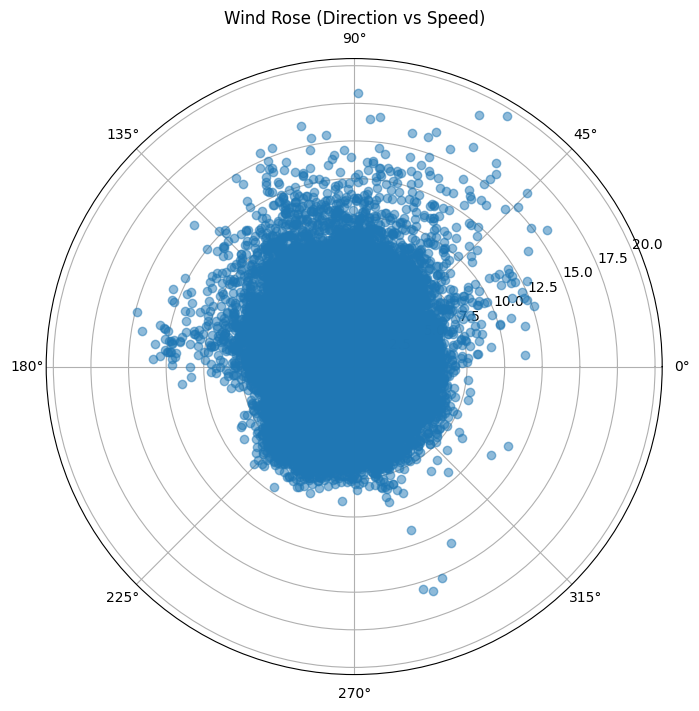

In [43]:
# Create a wind rose plot (simplified version)
wind_direction = df['WD']
wind_speed = df['WS']

# Plotting wind direction vs speed
plt.figure(figsize=(8, 8))
plt.polar(np.radians(wind_direction), wind_speed, 'o', alpha=0.5)
plt.title('Wind Rose (Direction vs Speed)')
plt.show()

D:\emnet\ee\10-academy\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


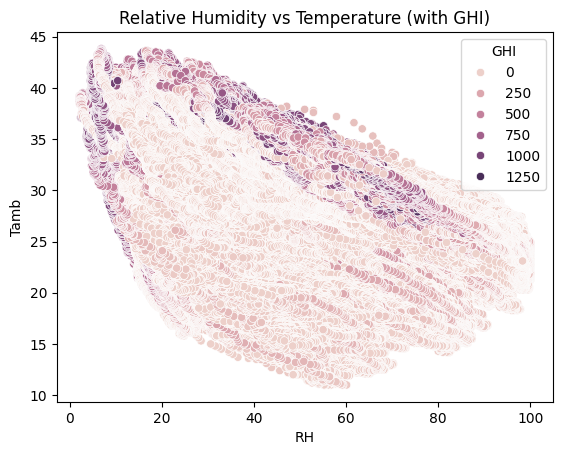

In [44]:
# Scatter plot of humidity vs temperature
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI')
plt.title('Relative Humidity vs Temperature (with GHI)')
plt.show()


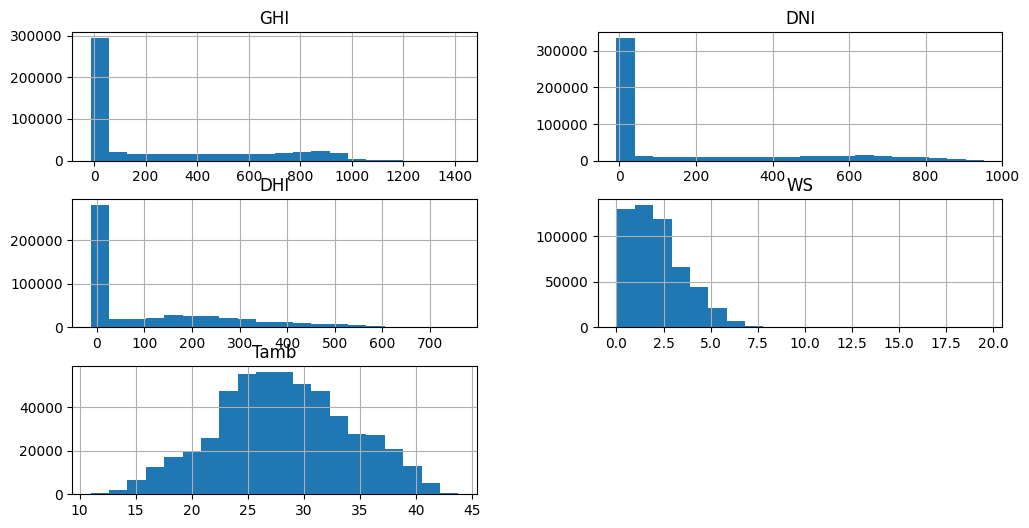

In [29]:
# Create histograms
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=20, figsize=(12, 6))
plt.show()


In [31]:
z_scores = np.abs(zscore(df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']]))
df_outliers = (z_scores > 3).sum(axis=0)
print(df_outliers)

GHI       89
DNI        0
DHI     3738
WS      3109
Tamb       0
dtype: int64


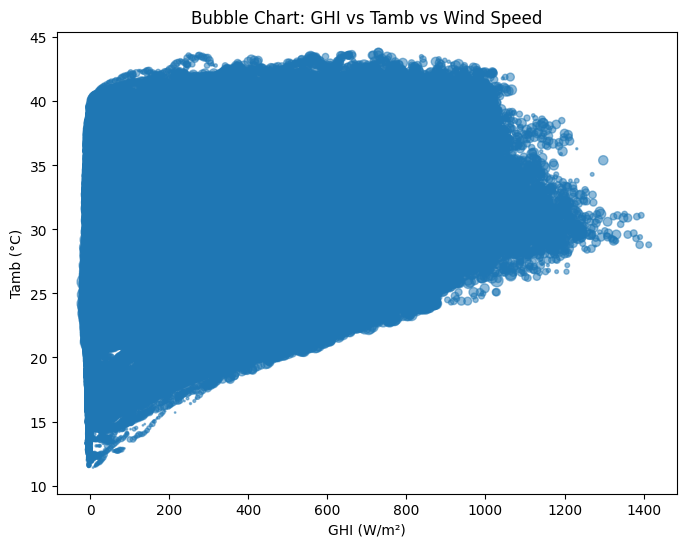

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['WS'] * 10, alpha=0.5)
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('Bubble Chart: GHI vs Tamb vs Wind Speed')
plt.show()

In [35]:
# Drop columns that are mostly null
df = df.drop(columns=['Comments'])

# Fill missing numeric values with the mean
df['GHI'] = df['GHI'].fillna(df['GHI'].mean())
df['DNI'] = df['DNI'].fillna(df['DNI'].mean())
df['DHI'] = df['DHI'].fillna(df['DHI'].mean())

# Drop rows with negative values for sensor data
df = df[df['GHI'] >= 0]
df = df[df['DNI'] >= 0]
df = df[df['DHI'] >= 0]


KeyError: "['Comments'] not found in axis"